# Analysis of House Planning Decisions in Ireland (Part 2)


## Import libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Preparation

In [2]:
df = pd.read_csv('/Users/atandaridwan/Desktop/house planning/Final_Dataframe.csv')

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,ReceivedDate,DecisionDate,GrantDate,Shape__Area,Shape__Length,NumResidentialUnits,Final_Decision,County,Time of Processing,Residential,Season
0,0,0,1/3/12,2/24/12,3/28/12,11962.371580,554.829955,1,Approved,Carlow,52,True,Winter
1,1,1,1/17/12,3/9/12,4/11/12,9279.356445,456.975115,0,Approved,Carlow,52,False,Winter
2,2,2,1/18/12,4/17/12,5/18/12,4652.466309,297.654346,0,Approved,Carlow,90,False,Winter
3,3,3,1/20/12,4/18/12,5/21/12,2146.843262,210.766716,0,Approved,Carlow,89,False,Winter
4,4,4,1/24/12,10/1/12,1/1/70,27728.525880,760.981199,0,Disapproved,Carlow,251,False,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130711,130711,131682,8/31/20,10/23/20,12/4/20,426.499023,89.425179,3,Approved,Dublin,53,True,Summer
130712,130712,131683,10/2/20,11/24/20,1/11/21,1791.494141,211.412041,3,Approved,Dublin,53,True,Fall
130713,130713,131684,10/7/20,11/30/20,1/11/21,1010.335938,128.134294,3,Approved,Dublin,54,True,Fall
130714,130714,131685,10/15/20,12/8/20,2/2/21,515.128906,121.562567,2,Approved,Dublin,54,True,Fall


## Value Counts

In [4]:
df['Residential'].value_counts()


False    67004
True     63712
Name: Residential, dtype: int64

In [5]:
df.County.value_counts()

Galway       14670
Donegal      12696
Dublin       11381
Kerry        10581
Wicklow       8215
Tipperary     7107
Clare         7021
Waterford     6373
Cork          6272
Kilkenny      6012
Mayo          5939
Kildare       5497
Westmeath     4227
Laois         3585
Offaly        3368
Roscommon     3227
Sligo         2944
Monaghan      2874
Carlow        2515
Cavan         2469
Longford      1698
Meath         1129
Leitrim        820
Louth           96
Name: County, dtype: int64

In [6]:
#Merge dublin and south together

def change(x):
    if x == 'South':
        return 'Dublin'
    else:
        return x

In [7]:
df['County'] = df['County'].apply(lambda x: change(x))

In [8]:
df.County.value_counts()

Galway       14670
Donegal      12696
Dublin       11381
Kerry        10581
Wicklow       8215
Tipperary     7107
Clare         7021
Waterford     6373
Cork          6272
Kilkenny      6012
Mayo          5939
Kildare       5497
Westmeath     4227
Laois         3585
Offaly        3368
Roscommon     3227
Sligo         2944
Monaghan      2874
Carlow        2515
Cavan         2469
Longford      1698
Meath         1129
Leitrim        820
Louth           96
Name: County, dtype: int64

## Exploratory Analysis 

In [9]:
#check for rows with time of processing less than 0
df[df['Time of Processing'] < 0]

,Unnamed: 0,Unnamed: 0.1,ReceivedDate,DecisionDate,GrantDate,Shape__Area,Shape__Length,NumResidentialUnits,Final_Decision,County,Time of Processing,Residential,Season


In [10]:
#drop rows with time of processing less than 0 as there is an error in their dates
df = df[~df['Time of Processing'] < 0]

In [11]:
df

,Unnamed: 0,Unnamed: 0.1,ReceivedDate,DecisionDate,GrantDate,Shape__Area,Shape__Length,NumResidentialUnits,Final_Decision,County,Time of Processing,Residential,Season
0,0,0,1/3/12,2/24/12,3/28/12,11962.371580,554.829955,1,Approved,Carlow,52,True,Winter
1,1,1,1/17/12,3/9/12,4/11/12,9279.356445,456.975115,0,Approved,Carlow,52,False,Winter
2,2,2,1/18/12,4/17/12,5/18/12,4652.466309,297.654346,0,Approved,Carlow,90,False,Winter
3,3,3,1/20/12,4/18/12,5/21/12,2146.843262,210.766716,0,Approved,Carlow,89,False,Winter
4,4,4,1/24/12,10/1/12,1/1/70,27728.525880,760.981199,0,Disapproved,Carlow,251,False,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130711,130711,131682,8/31/20,10/23/20,12/4/20,426.499023,89.425179,3,Approved,Dublin,53,True,Summer
130712,130712,131683,10/2/20,11/24/20,1/11/21,1791.494141,211.412041,3,Approved,Dublin,53,True,Fall
130713,130713,131684,10/7/20,11/30/20,1/11/21,1010.335938,128.134294,3,Approved,Dublin,54,True,Fall
130714,130714,131685,10/15/20,12/8/20,2/2/21,515.128906,121.562567,2,Approved,Dublin,54,True,Fall


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130716 entries, 0 to 130715
Data columns (total 13 columns):
Unnamed: 0             130716 non-null int64
Unnamed: 0.1           130716 non-null int64
ReceivedDate           130716 non-null object
DecisionDate           130716 non-null object
GrantDate              130716 non-null object
Shape__Area            130716 non-null float64
Shape__Length          130716 non-null float64
NumResidentialUnits    130716 non-null int64
Final_Decision         130716 non-null object
County                 130716 non-null object
Time of Processing     130716 non-null int64
Residential            130716 non-null bool
Season                 130716 non-null object
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 13.1+ MB


In [13]:
list(df['NumResidentialUnits'])

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,


In [14]:
df['Time of Processing'].median()

55.0

In [15]:
#drop columns with check
df = df[df['Final_Decision'] != 'check']

In [16]:
df['Final_Decision'].value_counts()

Approved       115898
Disapproved     14631
Pending           187
Name: Final_Decision, dtype: int64

## Data Visualisation



### Count of Final Decisions

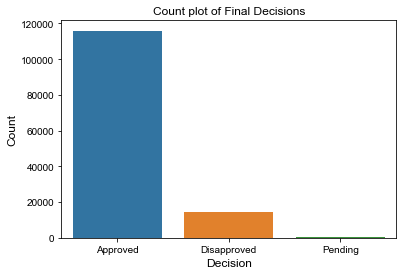

In [17]:
#count plot of final decisions
sns.countplot(df['Final_Decision'])
sns.set(style="darkgrid")
plt.title('Count plot of Final Decisions')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Decision', fontsize=12)
plt.show()

### Histogram showing distribution of time of processing

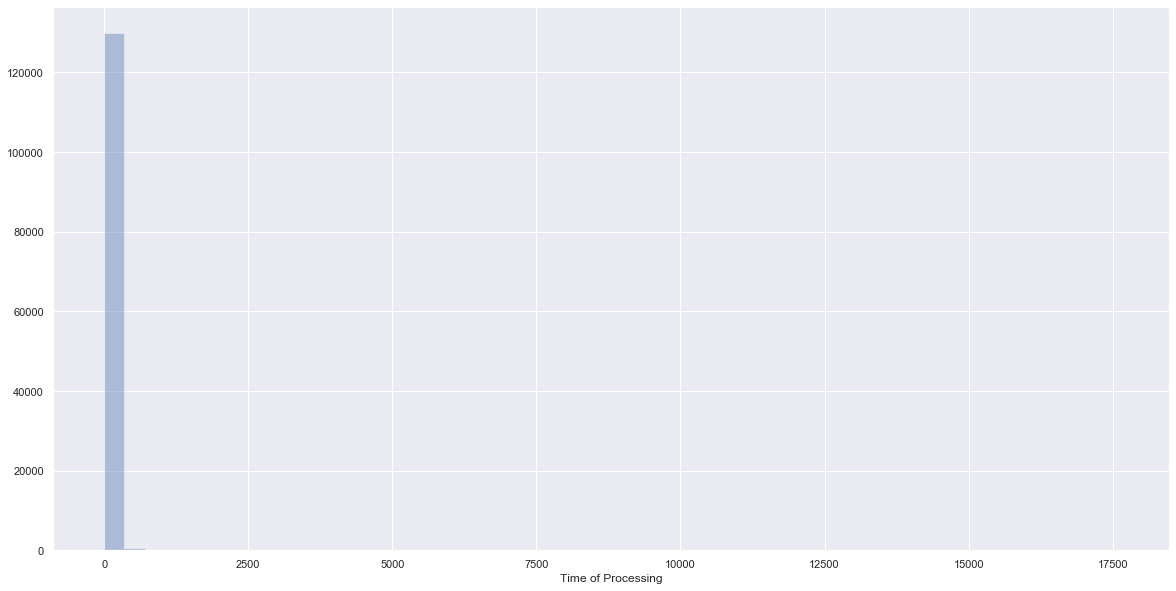

In [18]:

plt.figure(figsize=(20,10))
sns.distplot(df['Time of Processing'], kde=False)
plt.show()

In [19]:
df = df[df['ReceivedDate'] != '01/01/1970']

In [20]:
df = df[df['Time of Processing'] != 1441]

In [21]:
df['Time of Processing'].max()

17605

In [22]:
17605/365

48.23287671232877

In [23]:
#get residential status
def getRes(x):
    if x>0:
        return 'True'
    else:
        return 'False'

In [24]:
df['Residential']  = df['NumResidentialUnits'].apply(lambda x: getRes(x))

In [25]:
df.groupby('Residential')['Final_Decision'].count()

Residential
False    67004
True     63712
Name: Final_Decision, dtype: int64

In [26]:
residential = pd.DataFrame(df.groupby('Residential')['Time of Processing'].mean()).reset_index()

In [27]:
residential

,Residential,Time of Processing
0,False,83.536669
1,True,90.139001


## Barplot showing processing time for residential and non residential buildings

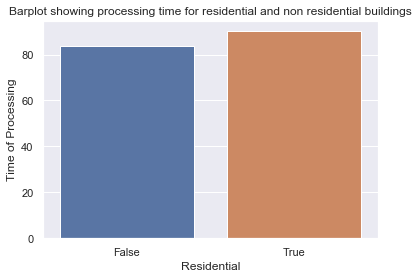

In [28]:
sns.barplot(residential['Residential'], residential['Time of Processing'])
plt.title('Barplot showing processing time for residential and non residential buildings')
plt.show()

In [29]:
#which counties have the highest number of applications?
numapps = pd.DataFrame(df.groupby('County')['Final_Decision'].count()).reset_index()
numapps

,County,Final_Decision
0,Carlow,2515
1,Cavan,2469
2,Clare,7021
3,Cork,6272
4,Donegal,12696
5,Dublin,11381
6,Galway,14670
7,Kerry,10581
8,Kildare,5497
9,Kilkenny,6012


## Count of each County Final Decisions 

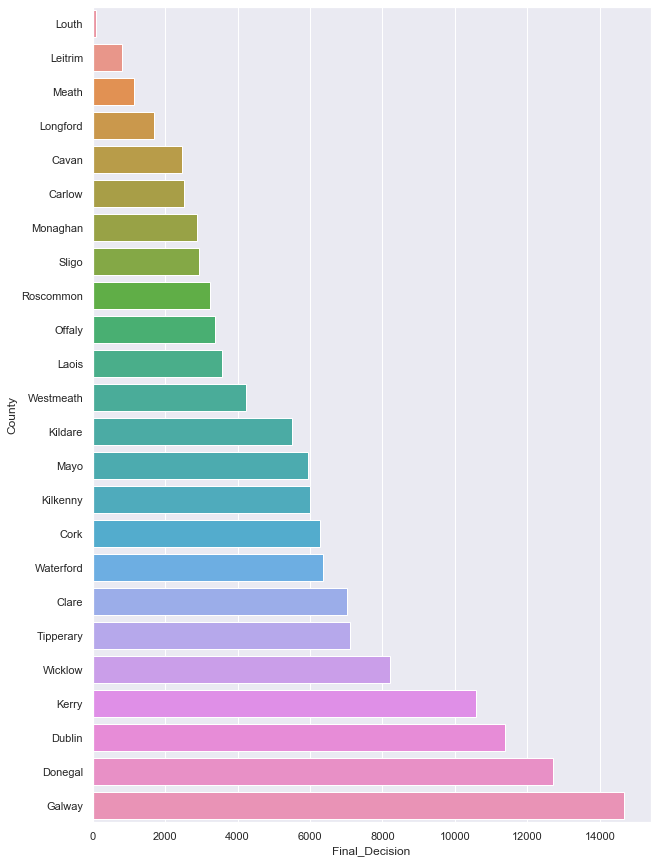

In [30]:
plt.figure(figsize=(10,15))
sns.barplot(numapps['Final_Decision'],numapps['County'],order=numapps.sort_values('Final_Decision').County)
plt.show()

In [31]:
#which counties have the fastest time of processing?
county_time = pd.DataFrame(df.groupby('County')['Time of Processing'].mean()).reset_index()
county_time

,County,Time of Processing
0,Carlow,111.205964
1,Cavan,87.582422
2,Clare,78.381854
3,Cork,85.391582
4,Donegal,75.744093
5,Dublin,59.316756
6,Galway,87.640491
7,Kerry,98.104054
8,Kildare,104.618701
9,Kilkenny,94.356953


## Time of Processing for Each County 

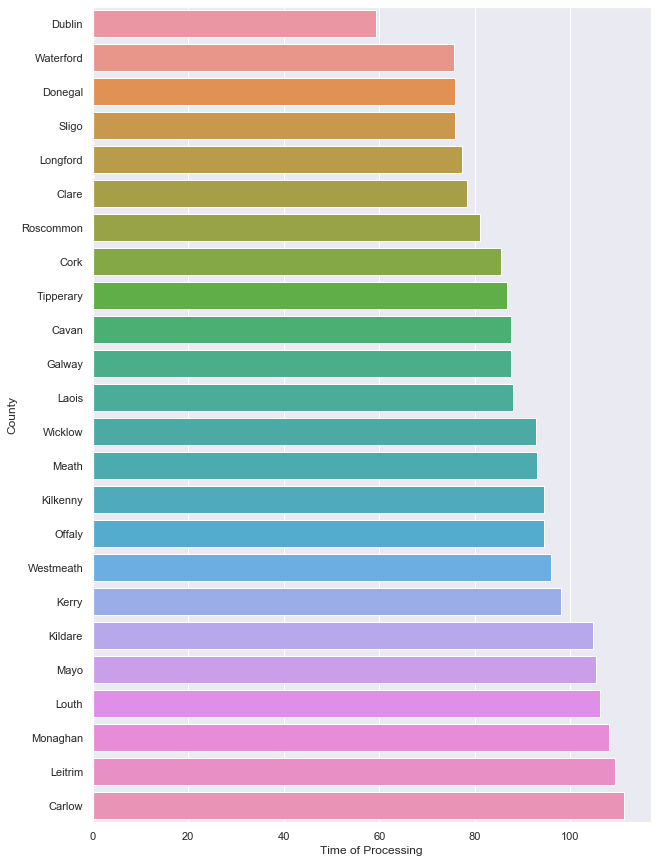

In [32]:
plt.figure(figsize=(10,15))
sns.barplot(county_time['Time of Processing'],county_time['County'],order=county_time.sort_values('Time of Processing').County)
plt.show()

#### Break dates into seasons

In [33]:
def getSeason(x):
    
    x = pd.to_datetime(x)
    
    if x.month >= 3 and x.month <= 5:
        return 'Spring'
    elif x.month >= 6 and x.month <= 8:
        return 'Summer'
    elif x.month >= 8 and x.month <= 10:
        return 'Fall'
    else:
        return 'Winter'

In [34]:
df['Season'] = df['ReceivedDate'].apply(lambda x: getSeason(x))

In [35]:
seasons = pd.DataFrame(df.groupby('Season')['Final_Decision'].count()).reset_index()
seasons

,Season,Final_Decision
0,Fall,21064
1,Spring,35161
2,Summer,33725
3,Winter,40766


In [36]:
df

,Unnamed: 0,Unnamed: 0.1,ReceivedDate,DecisionDate,GrantDate,Shape__Area,Shape__Length,NumResidentialUnits,Final_Decision,County,Time of Processing,Residential,Season
0,0,0,1/3/12,2/24/12,3/28/12,11962.371580,554.829955,1,Approved,Carlow,52,True,Winter
1,1,1,1/17/12,3/9/12,4/11/12,9279.356445,456.975115,0,Approved,Carlow,52,False,Winter
2,2,2,1/18/12,4/17/12,5/18/12,4652.466309,297.654346,0,Approved,Carlow,90,False,Winter
3,3,3,1/20/12,4/18/12,5/21/12,2146.843262,210.766716,0,Approved,Carlow,89,False,Winter
4,4,4,1/24/12,10/1/12,1/1/70,27728.525880,760.981199,0,Disapproved,Carlow,251,False,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130711,130711,131682,8/31/20,10/23/20,12/4/20,426.499023,89.425179,3,Approved,Dublin,53,True,Summer
130712,130712,131683,10/2/20,11/24/20,1/11/21,1791.494141,211.412041,3,Approved,Dublin,53,True,Fall
130713,130713,131684,10/7/20,11/30/20,1/11/21,1010.335938,128.134294,3,Approved,Dublin,54,True,Fall
130714,130714,131685,10/15/20,12/8/20,2/2/21,515.128906,121.562567,2,Approved,Dublin,54,True,Fall


In [37]:
df.Final_Decision.unique()

array(['Approved', 'Disapproved', 'Pending'], dtype=object)

In [38]:
#df.to_csv("Final_Dataframe.csv")

In [39]:
df['Residential'].value_counts()

False    67004
True     63712
Name: Residential, dtype: int64

## Count of Applications for each seasonal period  

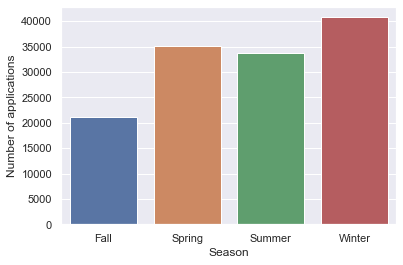

In [40]:
sns.barplot(seasons['Season'], seasons['Final_Decision'])
plt.ylabel('Number of applications')
plt.show()

### Approval rate based on season

In [41]:
fall = df[df['Season'] == 'Fall']
spring = df[df['Season'] == 'Spring']
summer = df[df['Season'] == 'Summer']
winter = df[df['Season'] == 'Winter']

In [42]:
fall.Final_Decision.value_counts()

Approved       18576
Disapproved     2458
Pending           30
Name: Final_Decision, dtype: int64

In [43]:
spring.Final_Decision.value_counts()

Approved       31363
Disapproved     3757
Pending           41
Name: Final_Decision, dtype: int64

In [44]:
summer.Final_Decision.value_counts()

Approved       29860
Disapproved     3820
Pending           45
Name: Final_Decision, dtype: int64

In [45]:
winter.Final_Decision.value_counts()

Approved       36099
Disapproved     4596
Pending           71
Name: Final_Decision, dtype: int64

In [46]:
summer.groupby('Final_Decision')['Residential'].count()

Final_Decision
Approved       29860
Disapproved     3820
Pending           45
Name: Residential, dtype: int64

In [48]:
counties = list(set(df.County))

In [49]:
len(set(df.County))

24

## Number of Residential and Non Residentila Applications for every counties 

In [50]:
res_dict = {}
for county in counties:
    values = []
    data = df[df['County'] == county]
    residentials = len(data[data['NumResidentialUnits'] > 0])
    non_residential = len(data[data['NumResidentialUnits'] == 0])
    values.append(residentials)
    values.append(non_residential)
    res_dict[county] = values
    print('The number of residential applications in ' + county + ' is ' + str(residentials))
    print('The number of non-residential applications in ' + county + ' is ' + str(non_residential))
    print('-------------------------')

The number of residential applications in Louth is 54
The number of non-residential applications in Louth is 42
-------------------------
The number of residential applications in Kerry is 10581
The number of non-residential applications in Kerry is 0
-------------------------
The number of residential applications in Wicklow is 0
The number of non-residential applications in Wicklow is 8215
-------------------------
The number of residential applications in Cavan is 1634
The number of non-residential applications in Cavan is 835
-------------------------
The number of residential applications in Sligo is 1464
The number of non-residential applications in Sligo is 1480
-------------------------
The number of residential applications in Galway is 9246
The number of non-residential applications in Galway is 5424
-------------------------
The number of residential applications in Kilkenny is 1955
The number of non-residential applications in Kilkenny is 4057
-------------------------
The 

In [51]:
res_dict

{'Louth': [54, 42],
 'Kerry': [10581, 0],
 'Wicklow': [0, 8215],
 'Cavan': [1634, 835],
 'Sligo': [1464, 1480],
 'Galway': [9246, 5424],
 'Kilkenny': [1955, 4057],
 'Roscommon': [1808, 1419],
 'Carlow': [982, 1533],
 'Waterford': [3631, 2742],
 'Kildare': [3374, 2123],
 'Leitrim': [474, 346],
 'Donegal': [6152, 6544],
 'Cork': [207, 6065],
 'Offaly': [1982, 1386],
 'Longford': [0, 1698],
 'Dublin': [5447, 5934],
 'Mayo': [1984, 3955],
 'Meath': [580, 549],
 'Clare': [2914, 4107],
 'Westmeath': [2696, 1531],
 'Laois': [2313, 1272],
 'Tipperary': [2401, 4706],
 'Monaghan': [1833, 1041]}

In [53]:
#dummy_variable_1 = pd.get_dummies(df["Final_Decision"])
#dummy_variable_1.head()

,Approved,Disapproved,Pending
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [54]:
#df5 = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
#df.drop("Final_Decision", axis = 1, inplace=True)

In [ ]:
#dummy_variable_2 = pd.get_dummies(df["Residential"])
#dummy_variable_2.head()

In [57]:
#df5 = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
#df.drop("Residential", axis = 1, inplace=True)

In [58]:
#df5.drop("Unnamed: 0", axis = 1, inplace = True)

In [59]:
#df5.rename(columns={"False": "Residential_False", "True": "Residential_True"}, inplace = True)